Raul Jimenez - 19017,
Bryann Alfaro - 19372, 
Donaldo Garcia - 19683,
Oscar Saravia - 19322,
Diego Arredondo - 19422

# Proyecto de deteccion de malware en archivos PE

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\raula\Documents\RAUL_ANGEL\UVG_COMPU\NOVENO_SEMESTRE\SECURITY-DATA-SCIENCE\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\raula\AppData\Local\Temp\ipykernel_41464\3209144236.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [4]:
test.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,Skype-8.10.0.9.exe,23117,80,2,0,4,15,65535,0,184,...,3221225536,0,11,122,0,0,102400,114688,0,53905336
1,vlc-3.0.2-win64.exe,23117,144,3,0,4,0,65535,0,184,...,3227517056,0,7,165,0,0,208896,430080,0,40201272
2,stinger32.exe,23117,64,1,0,2,0,65535,0,184,...,3758096608,0,1,2,7,36339712,36339976,36343808,0,16478208
3,SpotifyFullSetup.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,8,159,0,0,634448,679936,0,63220064
4,uftp_english.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,4,92,0,0,38620,49152,0,35544576


In [5]:
# turn to lower case all the columns names
train.columns = map(str.lower, train.columns)
test.columns = map(str.lower, test.columns)

## Remove na

In [6]:
train.dropna(inplace=True)
test.dropna(inplace=True)
train.shape

(19611, 79)

## Profiling

In [7]:

# report = pandas_profiling.ProfileReport(train)
# report.to_file("malware_PE_profiler.html")

## Select features to use

In [8]:
# show the correlation matrix of the train data
corr = train.corr()
corr['malware'].sort_values(ascending=False).head(20)

C:\Users\raula\AppData\Local\Temp\ipykernel_41464\267367297.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


malware                      1.000000
sectionmaxchar               0.393282
sizeofstackreserve           0.251791
suspiciousimportfunctions    0.216656
dllcharacteristics           0.197023
e_maxalloc                   0.186079
filealignment                0.172926
minorlinkerversion           0.145848
checksum                     0.135325
numberofsections             0.109373
sectionslength               0.109309
sizeofheapreserve            0.084892
e_lfanew                     0.074879
suspiciousnamesection        0.058088
sectionmaxpointerdata        0.045360
e_oeminfo                    0.042958
addressofentrypoint          0.042447
e_oemid                      0.041959
numberofsymbols              0.034467
e_ip                         0.034446
Name: malware, dtype: float64

In [9]:
#show the correlation matrix of the train data in descending order
corr = train.corr()
corr['malware'].sort_values(ascending=True).head(10)

C:\Users\raula\AppData\Local\Temp\ipykernel_41464\2366570252.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


majorsubsystemversion   -0.611621
subsystem               -0.492813
magic                   -0.287414
machine                 -0.287413
sizeofoptionalheader    -0.255692
timedatestamp           -0.230061
sectionalignment        -0.207061
majorlinkerversion      -0.133543
directoryentryimport    -0.128394
characteristics         -0.118662
Name: malware, dtype: float64

In [10]:
# Para el train clean se usaran las primeras 16 variables que tienen mayor correlacion con 'malware'
train_clean = train[['malware', 'sectionmaxchar', 'sizeofstackreserve','suspiciousimportfunctions','dllcharacteristics','minorlinkerversion','checksum','numberofsections','sectionslength','suspiciousnamesection','majorsubsystemversion','subsystem','magic','machine','sizeofoptionalheader','timedatestamp','sectionalignment']]

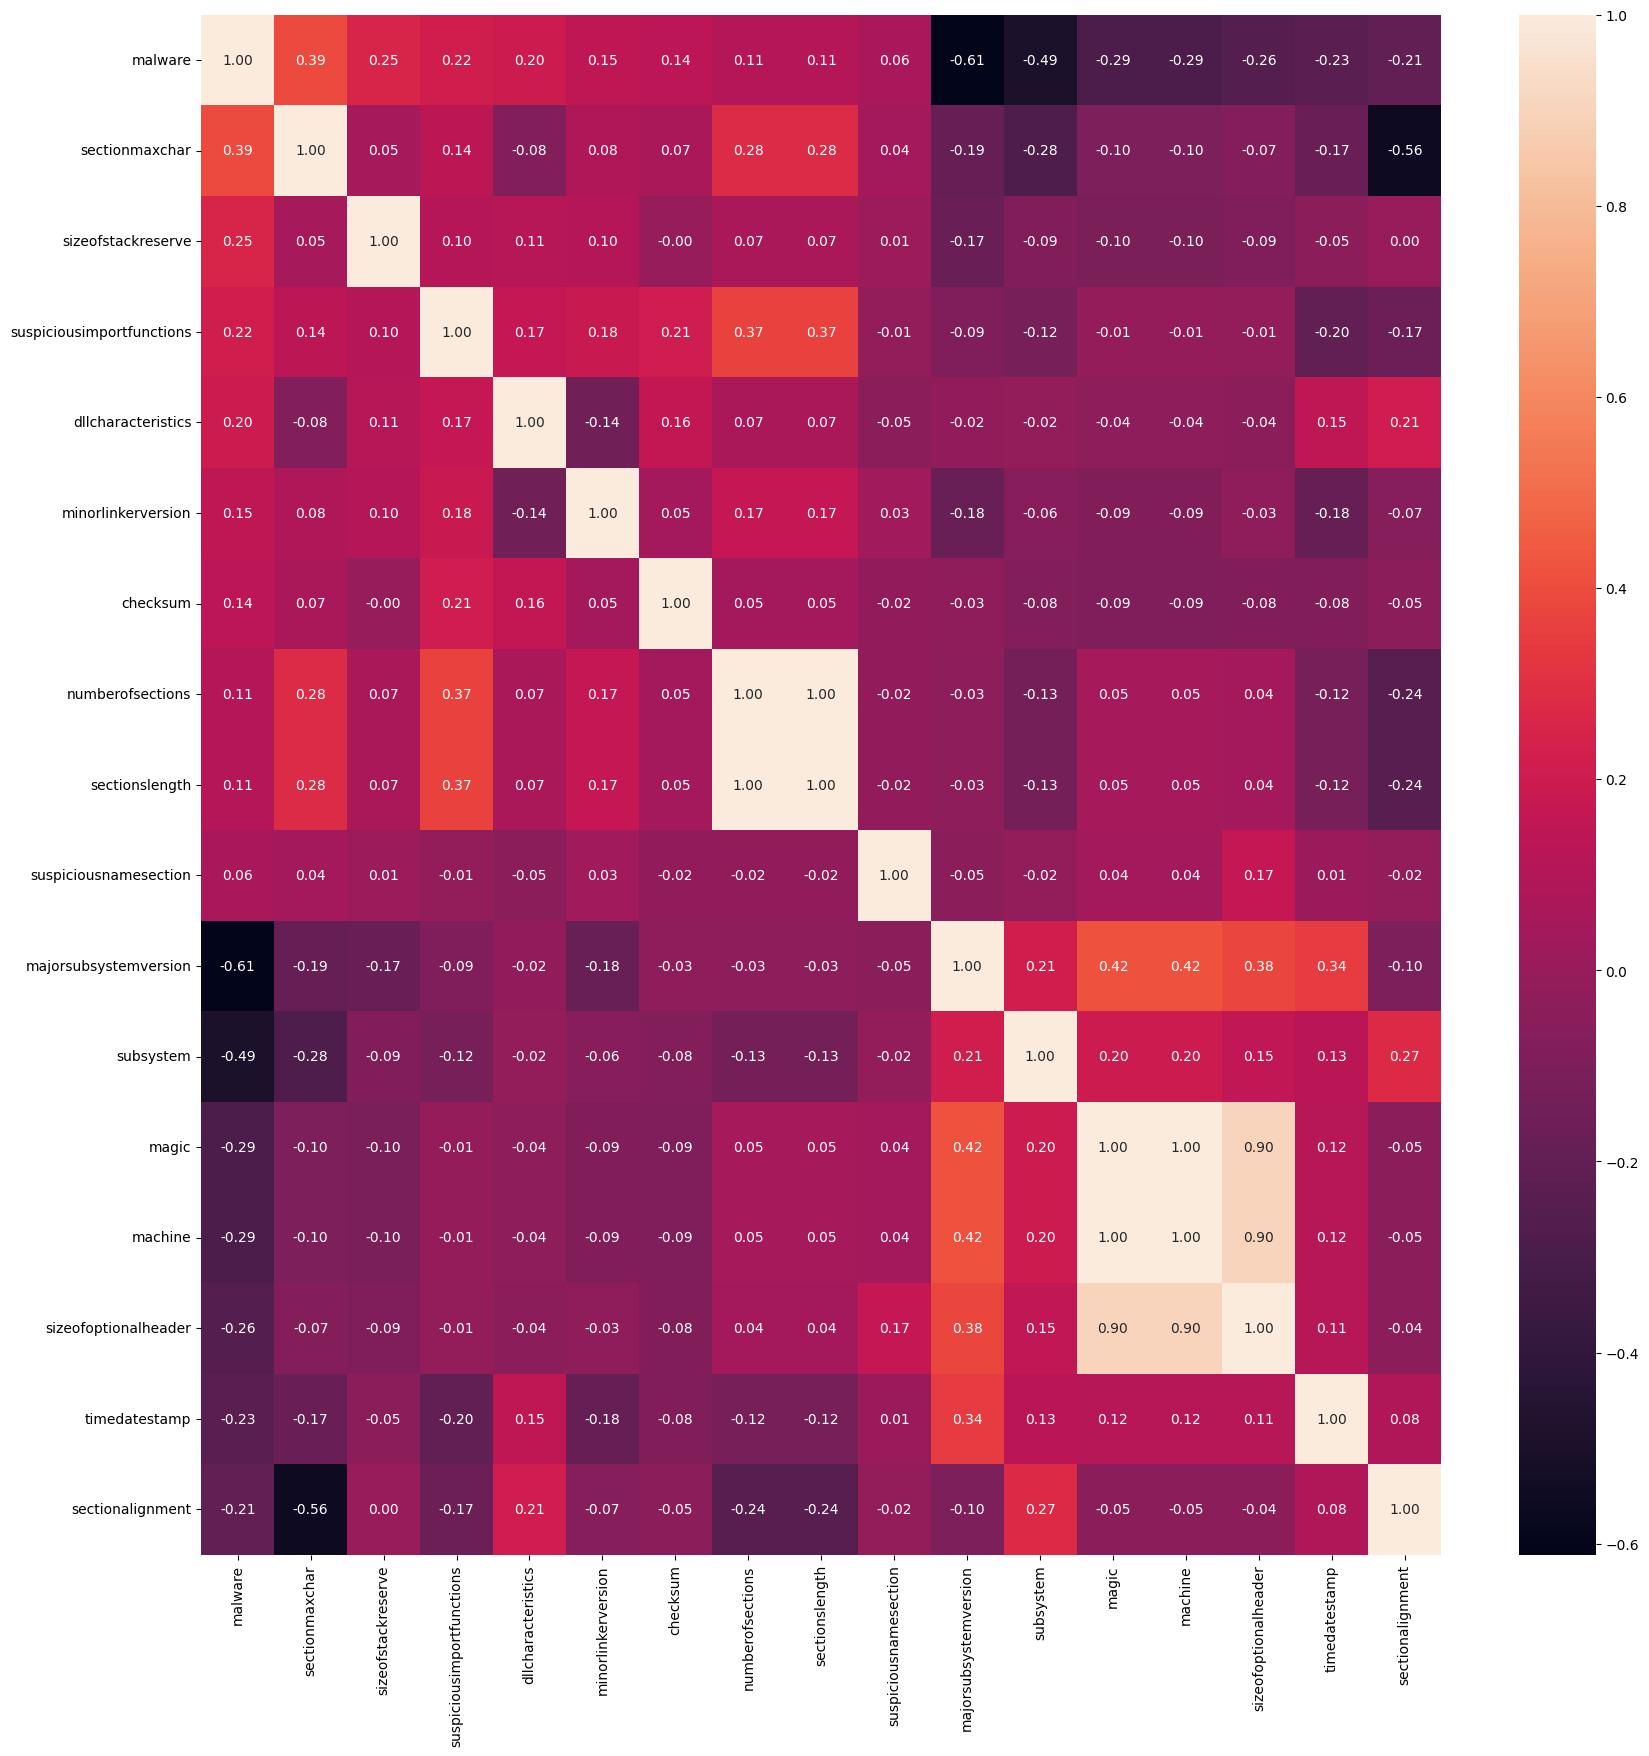

In [11]:
# show the heatmap of the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(train_clean.corr(), annot=True, fmt=".2f")
plt.show()

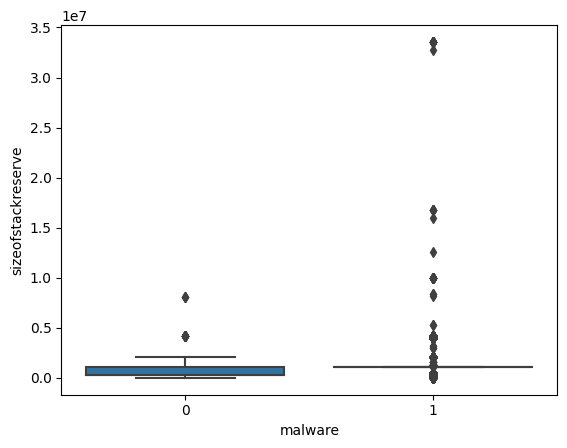

In [12]:
# show a box and whisker plot of the malware column and the sizeofstackreserve column
sns.boxplot(x='malware', y='sizeofstackreserve', data=train_clean)
plt.show()

In [13]:
# remove all the rows that has values over 1.0 in the sizeofstackreserve column
#GET ONLY THE ROWS THAT HAS SIZEOFSTACKRESERVE < 2.0
train_clean = train_clean[train_clean['sizeofstackreserve'] < 2.0e7]

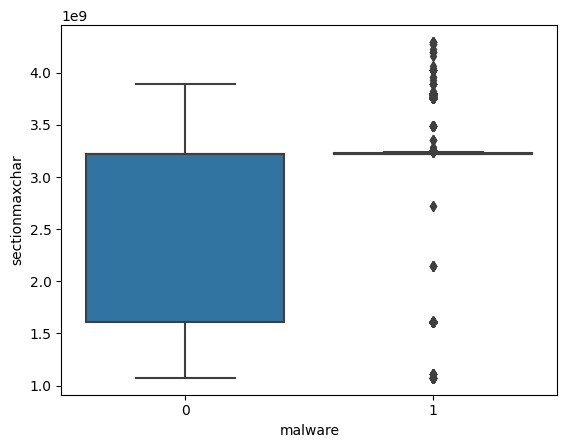

In [14]:
# show a box and whisker plot of the malware column and the sectionmaxchar column
sns.boxplot(x='malware', y='sectionmaxchar', data=train_clean)
plt.show()

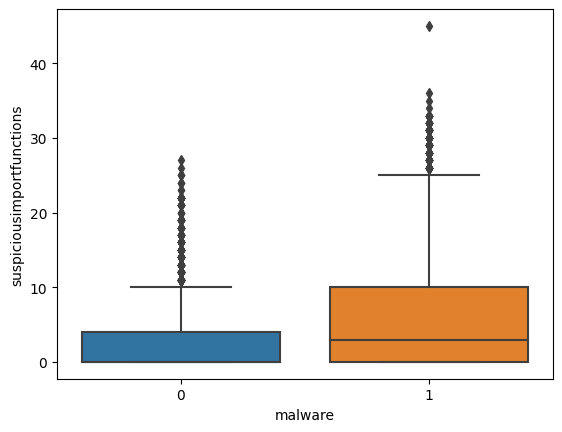

In [15]:
# show a box and whisker plot of the malware column and the suspiciousimportfunctions column
sns.boxplot(x='malware', y='suspiciousimportfunctions', data=train_clean)
plt.show()

## Balance data

In [16]:
# show balance of the data using the malware column
train_clean['malware'].value_counts()

1    14578
0     5012
Name: malware, dtype: int64

Debido a que la diferencia entre los datos no es significativa, se procede a dejar el dataset con 14,578 datos para malware y 5012 datos de archivos benignos. Esto debido a que si fueran 14,600/5012 la proporción es 3650/1253 lo que es casi un 3 a 1. 

# Separacion de data

In [17]:
target = train_clean['malware']
train_clean.drop('malware', axis=1, inplace=True)

In [18]:
x = train_clean
#separar en 70% train y 30% test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size=0.3, random_state=0)
#Separar train en 15% validacion y 85% train
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=0)

# Modelos

#### Random Forest

In [19]:
#Implement random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# create the classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(x_train, y_train)

# predict the test set
y_pred = clf.predict(x_test)

# evaluate the model
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))

Accuracy:  0.9509954058192955
Confusion matrix:  [[1273  257]
 [  31 4316]]
Classification report:                precision    recall  f1-score   support

           0       0.98      0.83      0.90      1530
           1       0.94      0.99      0.97      4347

    accuracy                           0.95      5877
   macro avg       0.96      0.91      0.93      5877
weighted avg       0.95      0.95      0.95      5877



In [20]:
#get precision, recall , f1
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))


Precision:  0.9438005685545594
Recall:  0.9928686450425581
F1:  0.967713004484305


<AxesSubplot: >

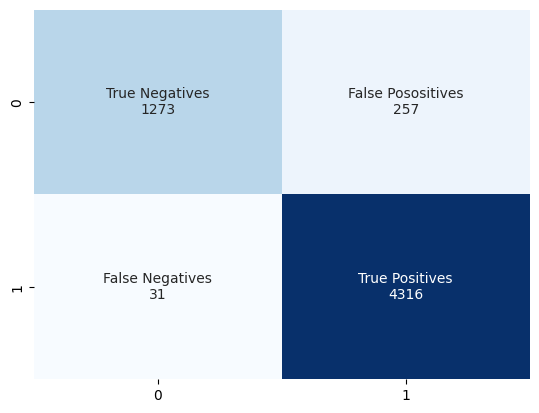

In [21]:
#Visualize the confusion matrix with tags
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ["True Negatives","False Posositives","False Negatives","True Positives"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False)

1273 corresponde a los verdaderos negativos. Esto significa que 1273 observaciones fueron predichas como limpias de malware y efectivamente eran limpias de malware.  

31 corresponde a los falsos negativos. Esto signfica que 31 observaciones fueron predichas como libres de malware pero en realidad eran malware.  

257 corresponde a los falsos positivos. Esto significa que 257 observaciones fueron predichas como malware pero en realidad no tenian malware.  

4316 corresponde a los verdaderos positivos. Esto significa que 4316 observaciones fueron predichas como malware y en realidad lo eran.

In [22]:
#Evaluate validation set
y_pred_val = clf.predict(x_val)
print('Accuracy: ', accuracy_score(y_val, y_pred_val))
print('Confusion matrix: ', confusion_matrix(y_val, y_pred_val))
print('Classification report: ', classification_report(y_val, y_pred_val))

Accuracy:  0.9474963539134662
Confusion matrix:  [[ 401   95]
 [  13 1548]]
Classification report:                precision    recall  f1-score   support

           0       0.97      0.81      0.88       496
           1       0.94      0.99      0.97      1561

    accuracy                           0.95      2057
   macro avg       0.96      0.90      0.92      2057
weighted avg       0.95      0.95      0.95      2057



<AxesSubplot: >

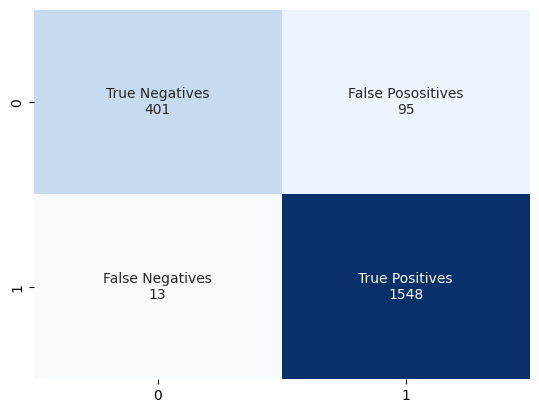

In [23]:
cf_matrix = confusion_matrix(y_val, y_pred_val)
group_names = ["True Negatives","False Posositives","False Negatives","True Positives"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False)

401 corresponde a los verdaderos negativos. Esto significa que 401 observaciones fueron predichas como limpias de malware y efectivamente eran limpias de malware.  

13 corresponde a los falsos negativos. Esto signfica que 13 observaciones fueron predichas como libres de malware pero en realidad eran malware.  

95 corresponde a los falsos positivos. Esto significa que 95 observaciones fueron predichas como malware pero en realidad no tenian malware.  

1548 corresponde a los verdaderos positivos. Esto significa que 1548 observaciones fueron predichas como malware y en realidad lo eran.

In [24]:
#Get precision, recall , f1
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: ', precision_score(y_val, y_pred_val))
print('Recall: ', recall_score(y_val, y_pred_val))
print('F1: ', f1_score(y_val, y_pred_val))


Precision:  0.9421789409616556
Recall:  0.9916720051249199
F1:  0.9662921348314607


In [25]:
#Cross validation k-fold 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_train, y_train, cv=10)
print('Cross-validated scores:', scores)
print('Mean cross-validated score:', scores.mean())


Cross-validated scores: [0.95197256 0.95540309 0.93825043 0.95454545 0.95454545 0.94768439
 0.95536481 0.9527897  0.95107296 0.95364807]
Mean cross-validated score: 0.951527690869338


Interpretacion con Random Forest  
Test data 
 
Al observar los resultados de precision, recall y F1 para los datos de test se observa que alrededor del 94% de los PE files son en realidad malware. Además, tomando en cuenta el recall se tiene que el modelo puede predecirr un 99% los malware en pe files tomando en cuenta la cantidad de datos disponibles y con un F1 de 96% lo cual es la media entre las medidas anteriores.

Validation data  

Al observar los resultados de precision, recall y F1 para los datos de validacion se observa que alrededor del 94% de los PE files son en realidad malware. Además, tomando en cuenta el recall se tiene que el modelo puede predecirr un 99% los malware en pe files tomando en cuenta la cantidad de datos disponibles y con un F1 de 96% lo cual es la media entre las medidas anteriores.

#### Decision Tree

In [37]:
# implement svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# create the classifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# predict the test set
y_pred = clf.predict(x_test)

# evaluate the model
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))

Accuracy:  0.9853666836821507
Confusion matrix:  [[1487   43]
 [  43 4304]]
Classification report:                precision    recall  f1-score   support

           0       0.97      0.97      0.97      1530
           1       0.99      0.99      0.99      4347

    accuracy                           0.99      5877
   macro avg       0.98      0.98      0.98      5877
weighted avg       0.99      0.99      0.99      5877



In [31]:
# get precision, recall , f1
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

Precision:  0.9903536977491961
Recall:  0.9919484702093397
F1:  0.9911504424778762


<AxesSubplot: >

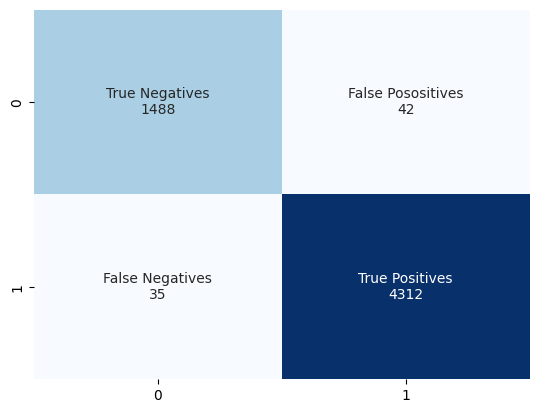

In [32]:
# Visualize the confusion matrix with tags
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ["True Negatives","False Posositives","False Negatives","True Positives"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False)

1488 corresponde a los verdaderos negativos. Esto significa que 1488 observaciones fueron predichas como limpias de malware y efectivamente eran limpias de malware.  

35 corresponde a los falsos negativos. Esto signfica que 35 observaciones fueron predichas como libres de malware pero en realidad eran malware.  

42 corresponde a los falsos positivos. Esto significa que 42 observaciones fueron predichas como malware pero en realidad no tenian malware.  

4312 corresponde a los verdaderos positivos. Esto significa que 4312 observaciones fueron predichas como malware y en realidad lo eran.

In [33]:
# Evaluate validation set
y_pred_val = clf.predict(x_val)
print('Accuracy: ', accuracy_score(y_val, y_pred_val))
print('Confusion matrix: ', confusion_matrix(y_val, y_pred_val))
print('Classification report: ', classification_report(y_val, y_pred_val))

Accuracy:  0.9834710743801653
Confusion matrix:  [[ 479   17]
 [  17 1544]]
Classification report:                precision    recall  f1-score   support

           0       0.97      0.97      0.97       496
           1       0.99      0.99      0.99      1561

    accuracy                           0.98      2057
   macro avg       0.98      0.98      0.98      2057
weighted avg       0.98      0.98      0.98      2057



<AxesSubplot: >

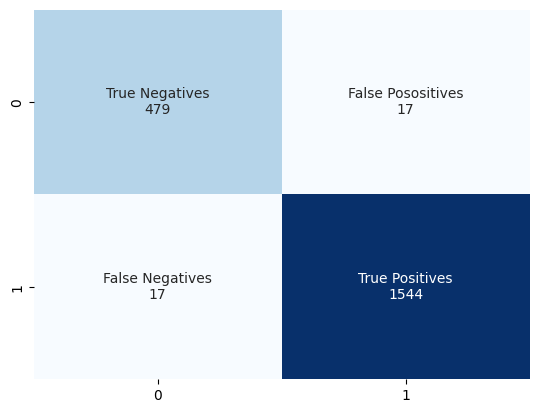

In [34]:
cf_matrix = confusion_matrix(y_val, y_pred_val)
group_names = ["True Negatives","False Posositives","False Negatives","True Positives"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False)

479 corresponde a los verdaderos negativos. Esto significa que 479 observaciones fueron predichas como limpias de malware y efectivamente eran limpias de malware.  

17 corresponde a los falsos negativos. Esto signfica que 17 observaciones fueron predichas como libres de malware pero en realidad eran malware.  

17 corresponde a los falsos positivos. Esto significa que 17 observaciones fueron predichas como malware pero en realidad no tenian malware.  

1544 corresponde a los verdaderos positivos. Esto significa que 1544 observaciones fueron predichas como malware y en realidad lo eran.

In [35]:
# Get precision, recall , f1
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: ', precision_score(y_val, y_pred_val))
print('Recall: ', recall_score(y_val, y_pred_val))
print('F1: ', f1_score(y_val, y_pred_val))


Precision:  0.9891095451633568
Recall:  0.9891095451633568
F1:  0.9891095451633568


In [36]:
# Cross validation k-fold 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_train, y_train, cv=10)
print('Cross-validated scores:', scores)
print('Mean cross-validated score:', scores.mean())

Cross-validated scores: [0.98799314 0.99056604 0.98799314 0.9897084  0.98542024 0.98799314
 0.98626609 0.98454936 0.98283262 0.97939914]
Mean cross-validated score: 0.9862721309785851


Interpretacion con Decision Tree  
Test data 
 
Al observar los resultados de precision, recall y F1 para los datos de test se observa que alrededor del 99% de los PE files son en realidad malware. Además, tomando en cuenta el recall se tiene que el modelo puede predecirr un 99% los malware en pe files tomando en cuenta la cantidad de datos disponibles y con un F1 de 99% lo cual es la media entre las medidas anteriores.

Validation data  

Al observar los resultados de precision, recall y F1 para los datos de validacion se observa que alrededor del 98% de los PE files son en realidad malware. Además, tomando en cuenta el recall se tiene que el modelo puede predecirr un 98% los malware en pe files tomando en cuenta la cantidad de datos disponibles y con un F1 de 98% lo cual es la media entre las medidas anteriores.